# Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import time

import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import math
from collections import Counter

In [2]:
acci = pd.read_pickle("acci.pkl")
acci.head()

,accident_index,1st_road_class,1st_road_number,2nd_road_number,accident_severity,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,...,vehicle_type,was_vehicle_left_hand_drive,x1st_point_of_impact,month,weekend,hour,time_of_day,season,engine_capacity_cc_size,accident_seriousness
0,201001BS70003,B,302,0,Slight,None,2010-01-11,Monday,1,Give way or uncontrolled,...,Goods Vehicle,No,Front,1,0,7,1,winter,small engine cc,Not Serious
1,201001BS70004,A,402,4204,Slight,None,2010-01-11,Monday,1,Auto traffic signal,...,Car,No,Front,1,0,18,6,winter,medium engine cc,Not Serious
3,201001BS70007,Unclassified,0,0,Slight,None,2010-01-02,Saturday,1,Give way or uncontrolled,...,Car,No,Nearside,1,1,21,6,winter,medium engine cc,Not Serious
4,201001BS70007,Unclassified,0,0,Slight,None,2010-01-02,Saturday,1,Give way or uncontrolled,...,Car,No,Front,1,1,21,6,winter,small engine cc,Not Serious
5,201001BS70008,A,3217,3220,Slight,None,2010-01-04,Monday,1,Auto traffic signal,...,Car,No,Nearside,1,0,20,6,winter,medium engine cc,Not Serious


# Number of Accidents per year(2010-2016)

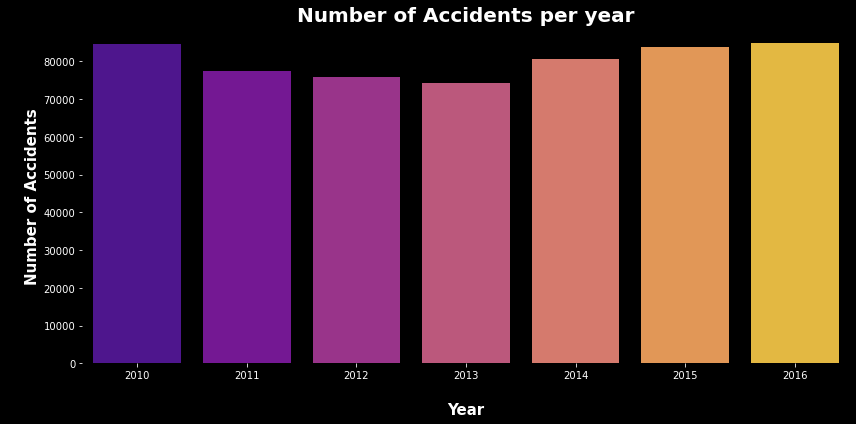

In [24]:
accidentsperyear = acci.groupby(['year'])['accident_index'].count()

plt.figure(figsize=(12,6))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(x=accidentsperyear.index,y=accidentsperyear.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Number of Accidents per year",fontsize=20,fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentsperyear.png')
plt.tight_layout()

# Number of Accidents in each month

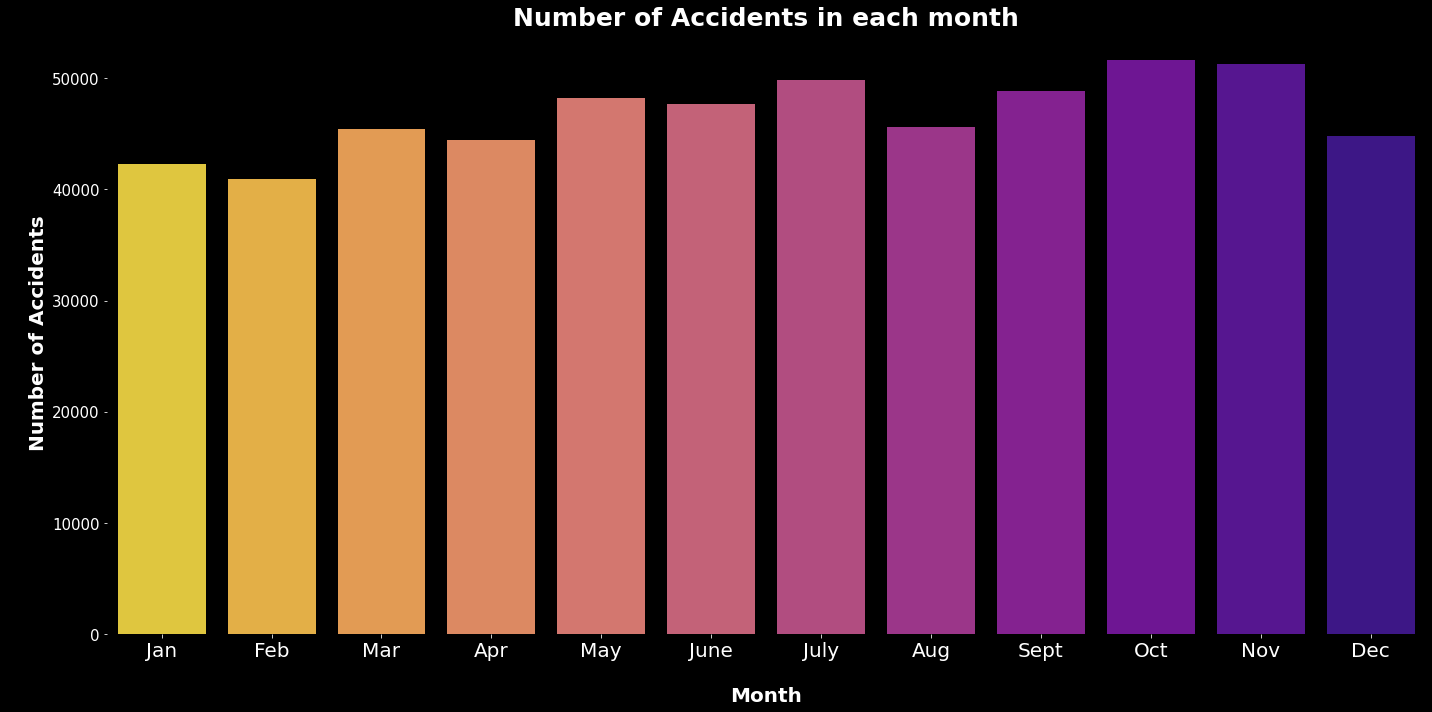

In [26]:
accidentspermonth = acci.groupby(['month'])['accident_index'].count()

plt.style.use('dark_background')
plt.figure(figsize=(20,10))
colors = sns.color_palette("plasma_r", n_colors=12)
mt=sns.barplot(x=accidentspermonth.index,y=accidentspermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)

group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Number of Accidents in each month",fontsize=25,fontweight="bold")
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("\nMonth", fontsize=20, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=20, fontweight="bold")
plt.savefig('accidentspermonth.png')
plt.tight_layout()

# Accidents by Weekday per Year

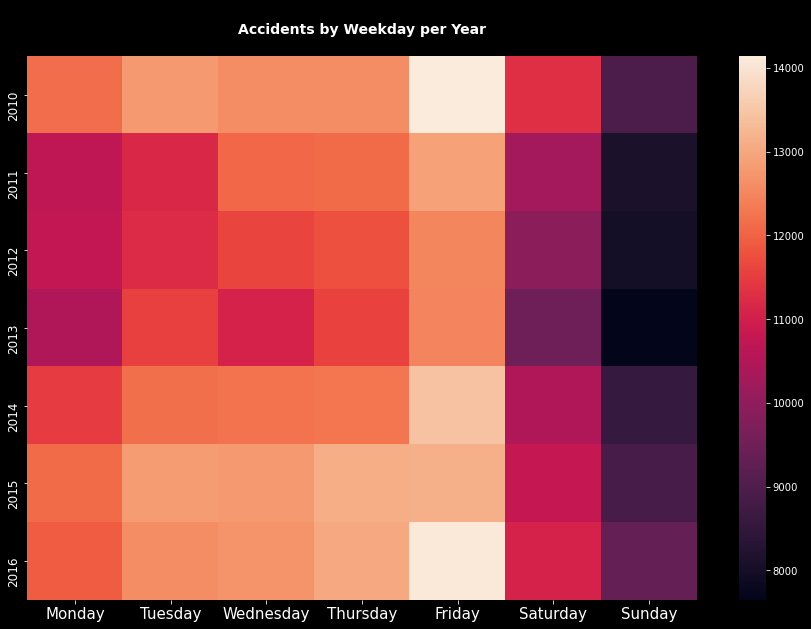

In [5]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = acci.groupby(['year', 'day_of_week']).size()
accweekday = accweekday.rename_axis(['year', 'day_of_week'])\
                               .unstack('day_of_week')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
sns.heatmap(accweekday, cmap='rocket')
plt.title('\nAccidents by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdayperyear.png')
plt.show()

# Number Of Accidents Per Season

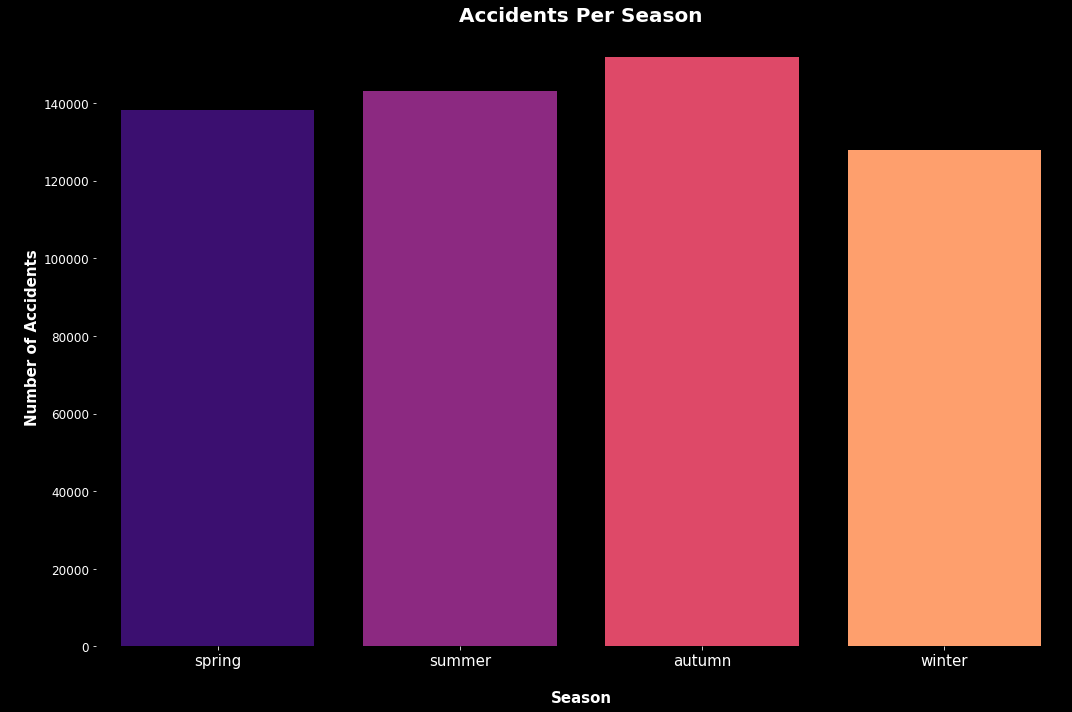

In [6]:
accidentsperseason = acci.groupby(['season'])['accident_index'].count()
seaord=['spring', 'summer', 'autumn','winter']

plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(x=accidentsperseason.index,y=accidentsperseason.values, order=seaord, 
            saturation=1, palette='magma')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nSeason", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentsperseason.png')

In [7]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"After Work Rush (16-18)", "Evening (18-22)", "Night (22-6)"

timeofdaygroups = {'1': "Morning Rush",
                   '2': "Day",
                   '3': "Lunch Rush",
                   '4': "Afternoon",
                   '5': "After Work Rush",
                   '6': "Evening",
                   '7': "Night"}
acci['time_of_day']=acci['time_of_day'].map(timeofdaygroups)

# Accidents Per Time of Day

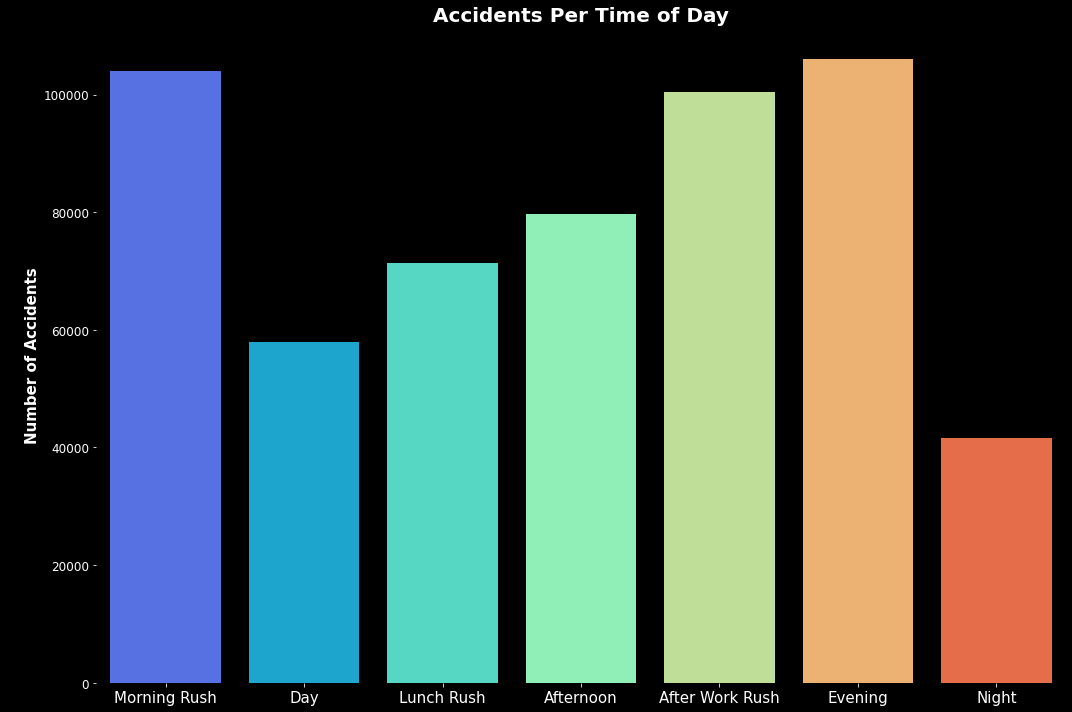

In [8]:
accidentspertod = acci.groupby(['time_of_day'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(x=accidentspertod.index,y=accidentspertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentspertod.png')

In [9]:
#dataframe where accidents are Slight
not_serious = acci[(acci['accident_seriousness']=="Not Serious")]
print("Not Serious Group Shape:", not_serious.shape)

not_serious.accident_seriousness.value_counts()

Not Serious Group Shape: (492804, 60)


Not Serious    492804
Name: accident_seriousness, dtype: int64

In [10]:
#dataframe where accidents are serious
serious= acci[(acci['accident_seriousness']=="Serious")]

print("Serious Group Shape:", serious.shape)
serious.accident_seriousness.value_counts()

Serious Group Shape: (68331, 60)


Serious    68331
Name: accident_seriousness, dtype: int64

In [11]:
# imddecile = {1:"Most deprived 10%", 2:"More deprived 10-20%", 3:"More deprived 20-30%", 
#              4:"More deprived 30-40%", 5:"More deprived 40-50%", 6:"Less deprived 40-50%", 
#              7:"Less deprived 30-40%", 8:"Less deprived 20-30%", 9:"Less deprived 10-20%", 
#              10:"Least deprived 10%"}

# not_serious['driver_imd_decile']=not_serious['driver_imd_decile'].map(imddecile)
# acci['driver_imd_decile']=acci['driver_imd_decile'].map(imddecile)
# serious['driver_imd_decile']=serious['driver_imd_decile'].map(imddecile)

In [12]:
#setups for adding frequencies to visualizations
accitotal= float(len(acci))
nstotal= float(len(not_serious))
setotal= float(len(serious))

# Number of Vehicles in Accidents

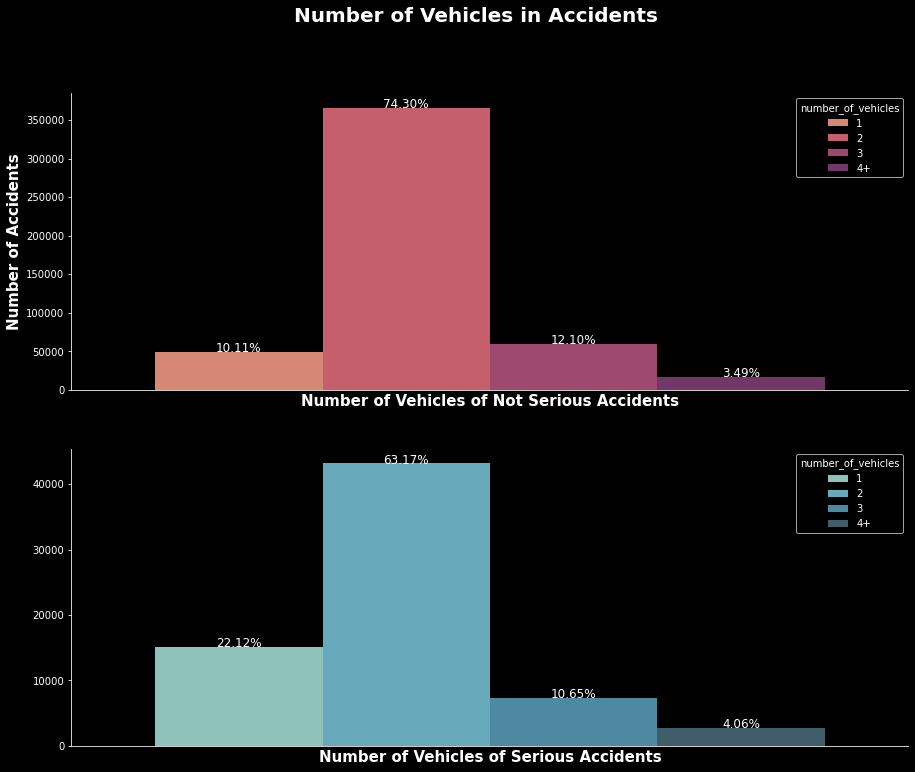

In [13]:
nov_order=["1","2", "3", "4+"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot(x="accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="flare", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot(x="accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="GnBu_d", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Number of Vehicles in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Number of Vehicles of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Number of Vehicles of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('number_of_vehicles.png')

# Speed Limit in Accidents

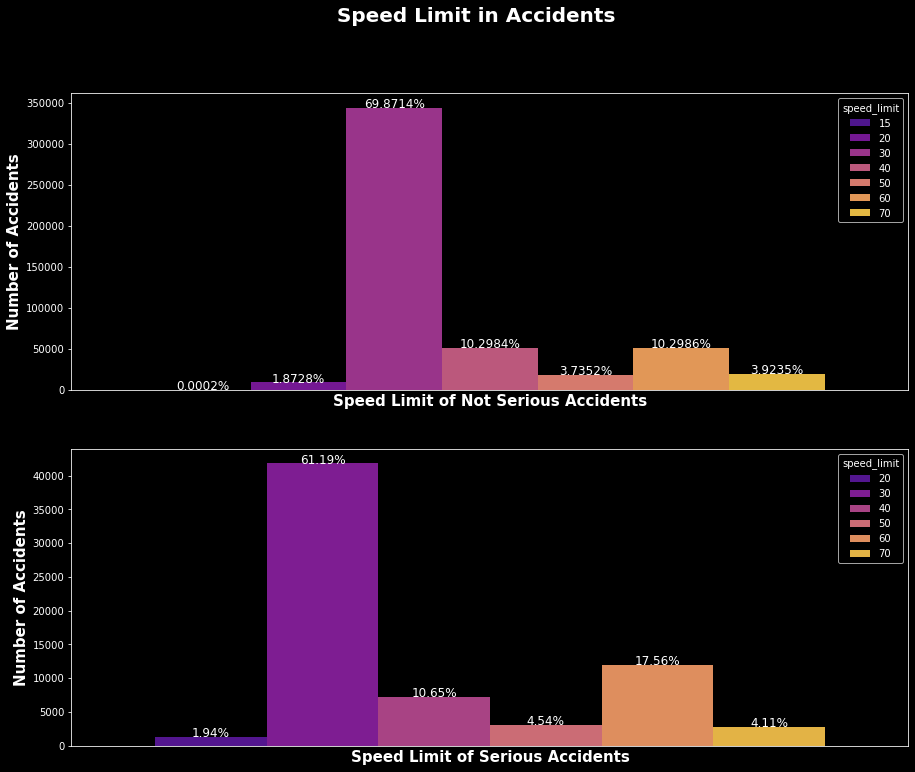

In [14]:
splt_order=[15, 20,30,40,50,60,70]
splt_order2=[20,30,40,50,60,70]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))

ax1 =sns.countplot(x="accident_seriousness", hue="speed_limit", hue_order=splt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.4f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot(x="accident_seriousness", hue="speed_limit", hue_order=splt_order2,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Speed Limit in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Speed Limit of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Speed Limit of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.savefig('speed_limit.png')

# Urban or Rural Areas vs Accidents

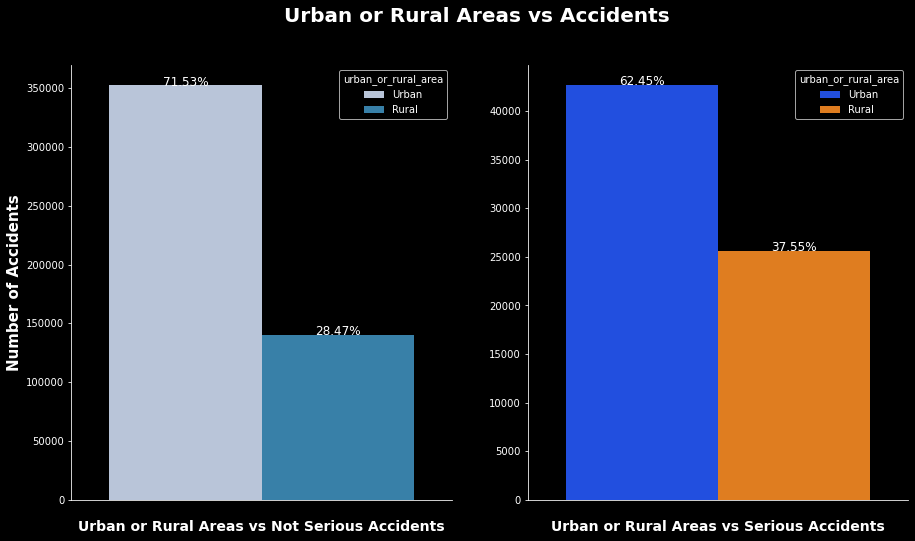

In [15]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot(x="accident_seriousness",  hue="urban_or_rural_area",
              palette="PuBu", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot(x="accident_seriousness",  hue="urban_or_rural_area",
              palette="bright", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Urban or Rural Areas vs Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nUrban or Rural Areas vs Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nUrban or Rural Areas vs Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('urban_or_rural_area.png')

# Sex of Driver in Accidents

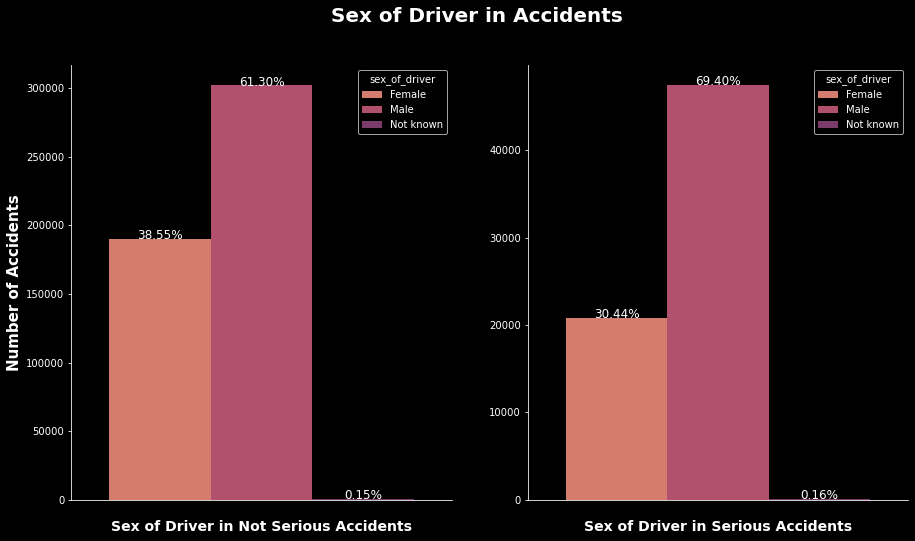

In [16]:
sod_order=["Female", "Male", "Not known"]

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot(x="accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="flare", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot(x="accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="flare", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Sex of Driver in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nSex of Driver in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nSex of Driver in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('sex_of_driver.png')

# Vehicle Type in Accidents

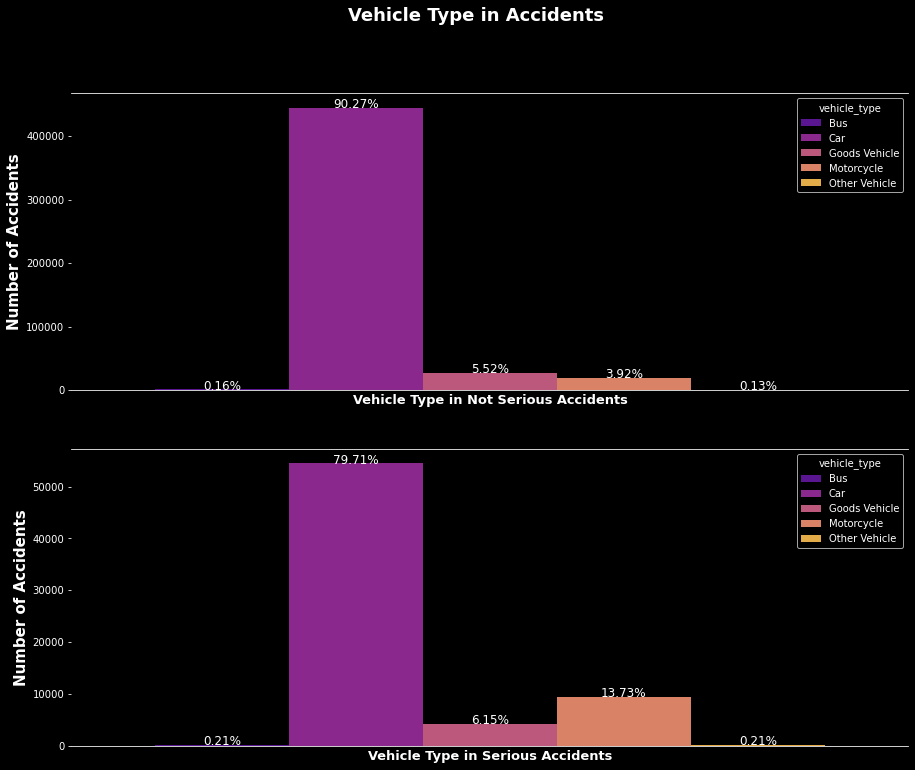

In [17]:
vt_order=['Bus', 'Car', 'Goods Vehicle', 'Motorcycle', 'Other Vehicle']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot(x="accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot(x="accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Type in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Vehicle Type in Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Vehicle Type in Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('vehicle_type.png')

# Driver Home Type Area in Accidents

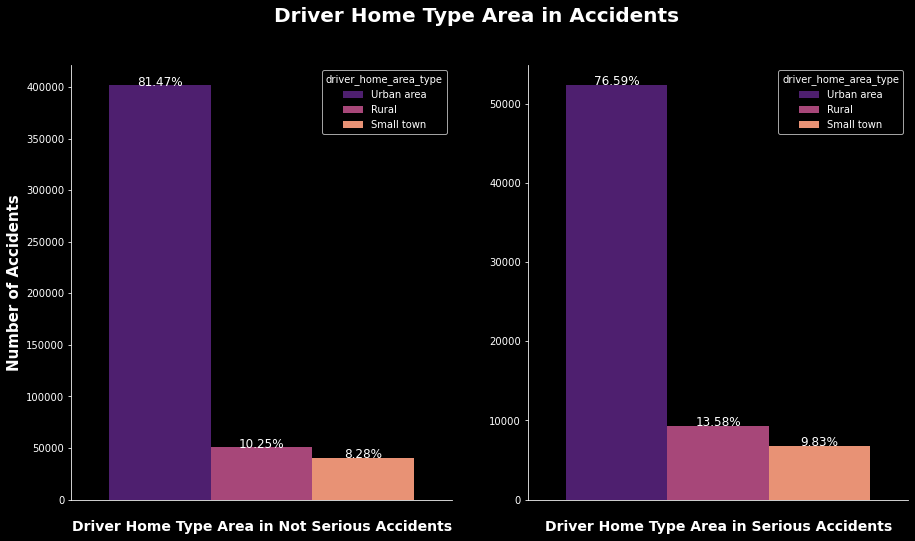

In [18]:
dhoa_order=['Urban area', 'Rural', 'Small town']

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot(x="accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot(x="accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Driver Home Type Area in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nDriver Home Type Area in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nDriver Home Type Area in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.savefig('driver_home_area.png')

# Accidents by Year

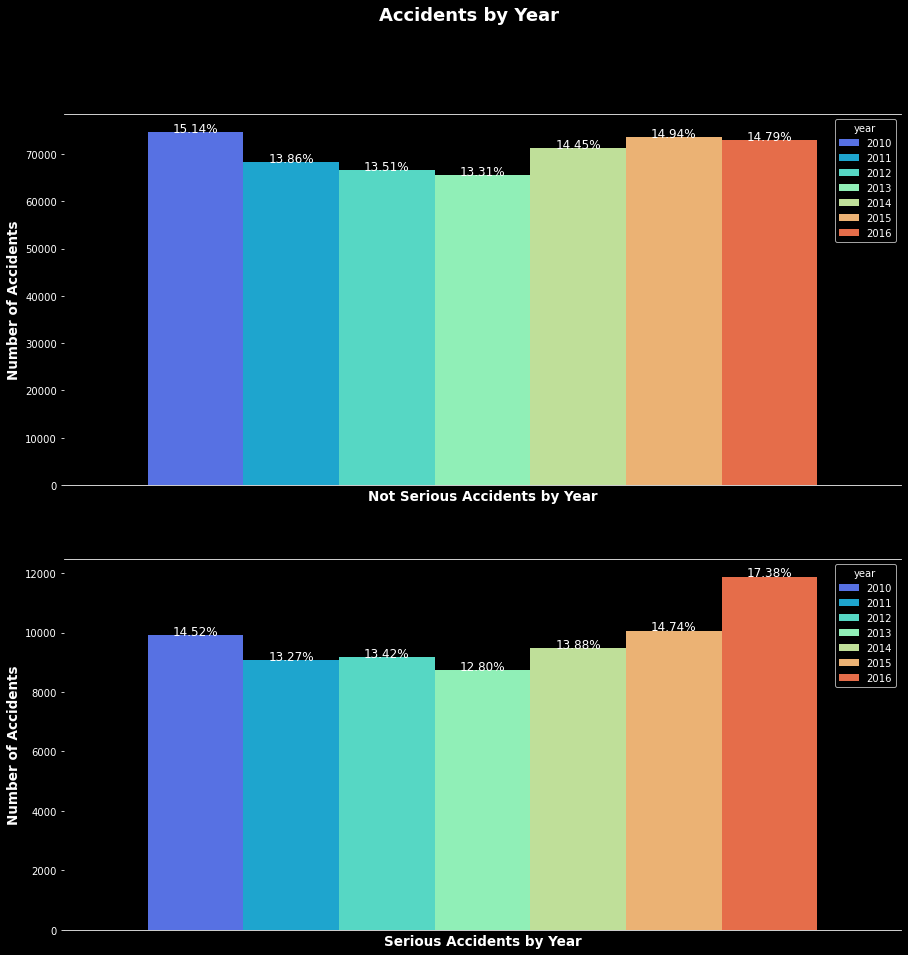

In [19]:
year_order=[2010, 2011, 2012, 2013, 2014, 2015, 2016]


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot(x="accident_seriousness", hue="year", hue_order=year_order,
              palette="rainbow", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot(x="accident_seriousness", hue="year", hue_order=year_order,
              palette="rainbow", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Accidents by Year", fontsize=18, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents by Year\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Serious Accidents by Year', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=13.5, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('year.png')

# Number of Casualties

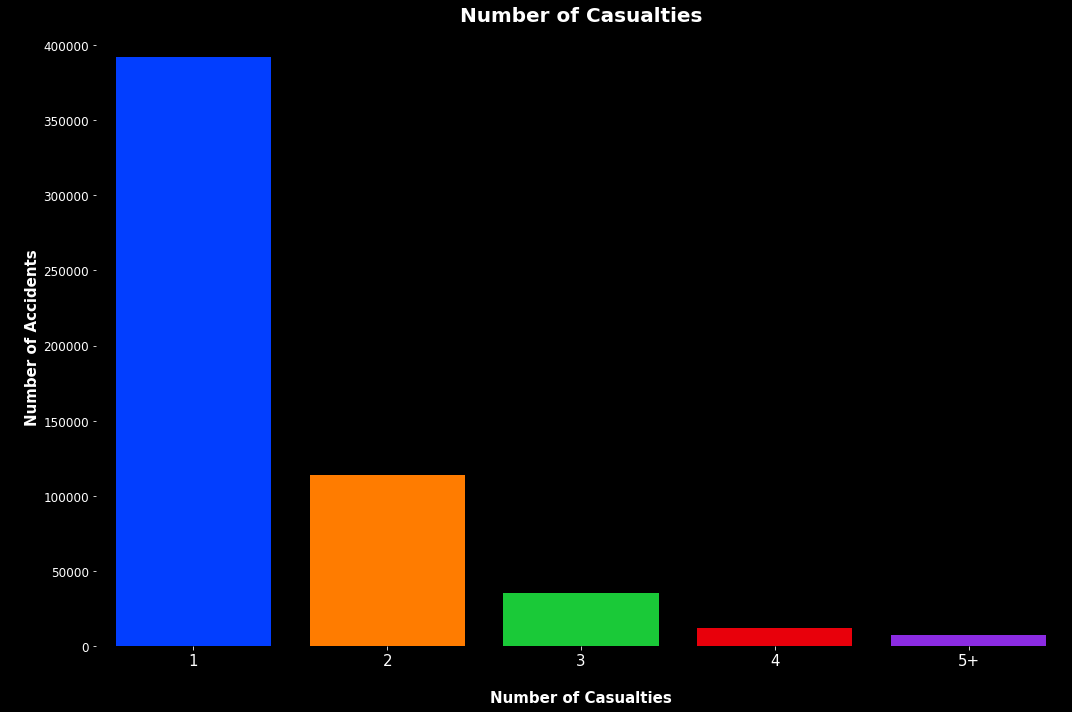

In [20]:
noOfCasualties = acci.groupby(['number_of_casualties'])['accident_index'].count()
casord=['1','2','3','4','5+']
# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(x=noOfCasualties.index,y=noOfCasualties.values, order=casord, 
            saturation=1, palette='bright')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Number of Casualties",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nNumber of Casualties", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('noOfCasualties.png')